# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Sebagai manusia, sangat mudah membedakan antara laki-laki dan perempuan. Namun terkadang ada beberapa
yang sulit dibedakan dari tampilan luar antara laki-laki dan perempuan. Ada perempuan yang menyerupai
laki-laki atau laki-laki menyerupai perempuan. Dari dataset dan model ini diharapkan bisa membantu
mempermudah membedakan antara laki-laki dan perempuan.  

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
bertujuan untuk menganalisis dan mempelajari secara spesifik perbedaan antara laki-laki dan perempuan dengan
mengukur panjang atau lebar dari beberapa anggota tubuh dengan cara matematis.

In [ ]:
Data Understanding

Data Understanding merupakan proses dimana kita mempertemukan antara data apa yang kita miliki dan data
apa yang kita seharusnya perlukan.
Dataset ini terdiri dari 6 kolom yang berisi 1 kolom float64, 1 kolom int64 dan 4 kolom objek.
Berikut atribut-atributnya :

0. long_hair = panjang rambut (int64)  
1. forehead_width_cm = lebar dahi dalam cm (float64)
2. forehead_height_cm = panjang dahi dalam cm (float64)
3. nose_wide = hidung lebar (int64)  
4. nose_long = hidung panjang (int64)  
5. lips_thin = bibir tipis (int64)  
6. distance_nose_to_lip_long = jarak antara hidung dengan bibir (int64)  
7. gender = gender atau jenis kelamin (objek)  

In [ ]:
Data Preparation

Proses data preparasi merupakan proses data treatment menuju model berkualitas yang berguna.
Yang menjadi fitur yaitu: 

1. long_hair  
2. forehead_width_cm
3. forehead_height_cm
4. nose_wide
5. nose_long  
6. lips_thin
7. distance_nose_to_lip_long               

Sedangkan, yang menjadi target yaitu gender

In [ ]:
Modeling

Model yang digunakan yaitu Logistic Regression.

In [ ]:
Evaluation

Evaluasi merupakan tahap validasi model yang dibentuk berdasarkan parameter-parameter yang relevan.
Parameter tersebut bisa berupa Parameter statistik, Parameter ekonomi dan lain-lain.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakan GitHub sebagai tempat menyimpan source code yang telah
dibuat dan Streamlit Share untuk mengaplikasikan source code yang telah diunggah di GitHub

# Import library

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("gender_classification_v7.csv")

In [44]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [46]:
df['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

# Transformasi Data

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

In [59]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [60]:
df.to_csv('gender.csv')

In [61]:
df['gender'].value_counts()

gender
0    2501
1    2500
Name: count, dtype: int64

# Visualisasi Data

gender
0    2501
1    2500
Name: count, dtype: int64

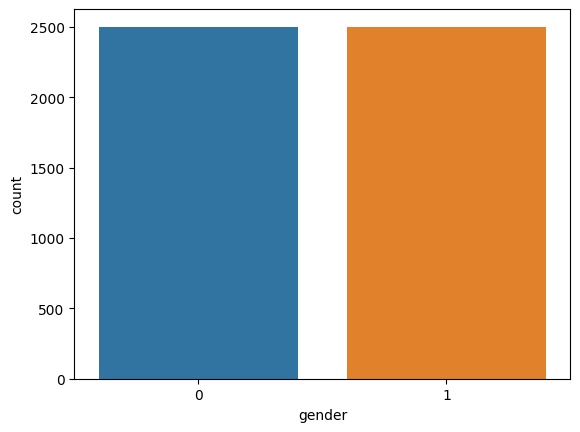

In [75]:
import seaborn as sns

sns.countplot(x = "gender", data = df)
df.loc[:,"gender"].value_counts()

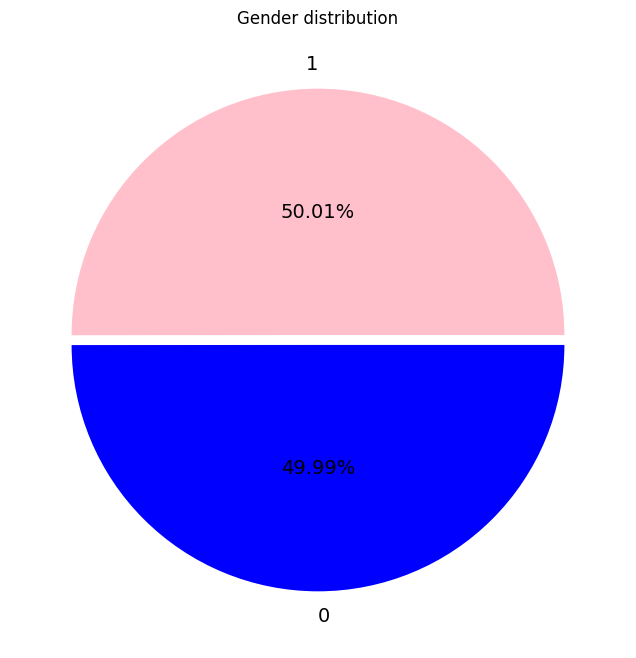

In [80]:
pie, ax = plt.subplots(figsize=[10,8])
labels = [1, 0]
colors = ['pink', 'blue']
plt.pie(x = df['gender'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Gender distribution')
plt.show()

# Split data

In [62]:
X = df.drop(columns=['gender'], axis=1)
Y = df['gender']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [64]:
print(X.shape, x_train.shape, x_test.shape)

(5001, 7) (4000, 7) (1001, 7)


# Membuat model training

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [66]:
model = lr.fit(x_train, y_train)

# Evaluasi model

In [67]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [68]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.968


In [69]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [70]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9690309690309691


# Model Prediksi

In [73]:
input_data = (0, 14, 5.4, 0, 0, 1, 0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi_gender = model.predict(data_reshaped)
print(prediksi_gender)

if (prediksi_gender[0] == 0):
    print('Kamu Adalah Perempuan')
else:
    print('Kamu Adalah Laki-laki')

[0]
Kamu Adalah Perempuan


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Save Model

In [74]:
import pickle

filename = 'JenisKelamin.sav'
pickle.dump(model, open(filename, 'wb'))